<center><h1> TP 4 </h1><h2>Logistic regression</h2></center>

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
import random
#params = {'tex.usetex': True}

We are given a family of $n$ points $x_i$ in $\mathbb{R}^2$, as well as $n$ \textit{labels} associated $(y_i)_{1 \leq i \leq n}$ in $\{0,1\}$.

We seek to find a relation between $x$ and $y$, in the form:
- if $\sigma(\langle w, x\rangle) \geq 0.5$, then $y=1$
- else $y=0$,
  
where $w = (w_1, w_2)\in \mathbb{R}^2$ is the unknown of the problem and $\sigma$ is the sigmoid function $z \mapsto \tfrac{1}{1+e^{-z}}$.


Thus, for a new unlabeled data $x$, we will calculate $\sigma(\langle w,x\rangle) \in [0,1]$, which will allow us to classify the point into $y = 0$ or $y=1$, and this, with a form of taking into account the uncertainty associated with this prediction.

To do so, we have to minimize the log-loss function:

\begin{equation*}
f(w)=-\frac1n \sum_{i=1}^n (y_i log (\sigma(\langle w,x_i \rangle))+ (1-y_i)log (1-\sigma(\langle w,x_i \rangle)) + \lambda \frac12 \lVert w\rVert^2,
\end{equation*}
where $\lambda$ is a regularization parameter.

#### Useful functions


In [67]:
# To observe the level circles of a function obj on a domain in R^2
def level_circle(obj, dom):
    # Grids definition and evaluation of f
    grid_size = 50
    x, y = np.linspace(dom[0], dom[1], grid_size), np.linspace(dom[2], dom[3], grid_size)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((grid_size, grid_size))
    for i in range(grid_size):
        for j in range(grid_size):
            Z[i, j] = obj([X[i, j], Y[i, j]]) 

    fig, ax = plt.subplots(figsize = (10, 10))
    CS = ax.contour(X, Y, Z, 50)
    ax.clabel(CS, fontsize = 8)
    ax.set_aspect('equal', adjustable = 'box') # pour que les axes aient la même échelle
    ax.set_xlim([dom[0], dom[1]]) 
    ax.set_ylim([dom[2], dom[3]])
    return fig, ax

# Function that allows to visualize the level circles of a function (obj), a list of points (xlist), and a final point (xstar)
# The parameter m allows to plot the points only each m values 
# i.e. we display x_{m j} for all j
def plot_descent(obj, dom, m, xlist, xstar):
    grid_size = 50
    X, Y = np.linspace(dom[0], dom[1], grid_size), np.linspace(dom[2], dom[3], grid_size)
    X, Y = np.meshgrid(X, Y)
    Z = np.zeros((grid_size, grid_size))
    for i in range(grid_size):
        for j in range(grid_size):
            Z[i, j] = obj([X[i, j], Y[i, j]])     
    fig, ax = plt.subplots(figsize = (10, 10))
    CS = ax.contour(X, Y, Z, 100)
    ax.clabel(CS, fontsize = 10)
    ax.set_xlim(dom[0], dom[1])
    ax.set_ylim(dom[2], dom[3])
    xlist = xlist[0::m]
    Xlist = [xlist[i][0] for i in range(len(xlist))]
    Ylist = [xlist[i][1] for i in range(len(xlist))]
    plt.plot(xstar[0], xstar[1], marker = "*", ms = 10.0, color = "r")
    plt.plot(Xlist, Ylist, marker = "o", ms = 4, color = "red")

### Data generation and plot 

In [78]:
# Parameter useful to generate the data 
t = 2*np.pi*np.random.rand()
u = np.array([np.cos(t), np.sin(t)])

In [79]:
def genererCouple():
    if np.random.rand() < 0.5:
        x, y = 2.*np.random.randn(2) + 3*u, 0 # green
    else:
        x, y = 2.*np.random.randn(2) - 3*u, 1 # red
    return [x, y]

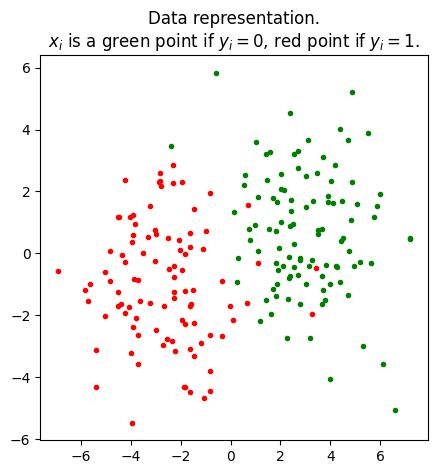

In [80]:
# data generation
n = 200 # n points
xi_list, yi_list = np.zeros((n, 2)), np.zeros(n)
for i in range(n):
    xi_list[i, :], yi_list[i] = genererCouple() # we stock the data ((x_i, y_i))_i

# plot
plt.figure(figsize = (5, 5))
for i in range(n):
    if yi_list[i] == 1: # if x_i is of class 1 the point is red 
        plt.plot(xi_list[i, 0], xi_list[i, 1], linestyle = "none", marker = '.', color = "red")
    else: # else green   
        plt.plot(xi_list[i, 0], xi_list[i, 1], linestyle = "none", marker = '.', color = "green")
plt.title(u"Data representation.\n" + r"$x_i$ is a green point if $y_i = 0$, red point if $y_i = 1$.")
plt.axis("tight")
plt.show()

## Exercice 1: 
Write one function $\texttt{f(w)}$ for the log-loss $f$ and one function $\texttt{gradf(w)}$ which compute its gradient.   

Indication: You can use the facts that $\sigma'(z)=\sigma(z) (1-\sigma(z))$ and that $1-\sigma(z)=\sigma(-z)$ and write the derivatives of  two functions $\texttt{phi1}$ and $\texttt{phi2}$ that will represents $- log (\sigma(z))$ and $-log(1-\sigma(z))$ resp.

In [81]:
# Choice for the regularization parameter
lda = 1e-2#.01

In [82]:
# Sigmoid function
def sigmoid(t):
    return ...

In [83]:
def f(w):
    ...

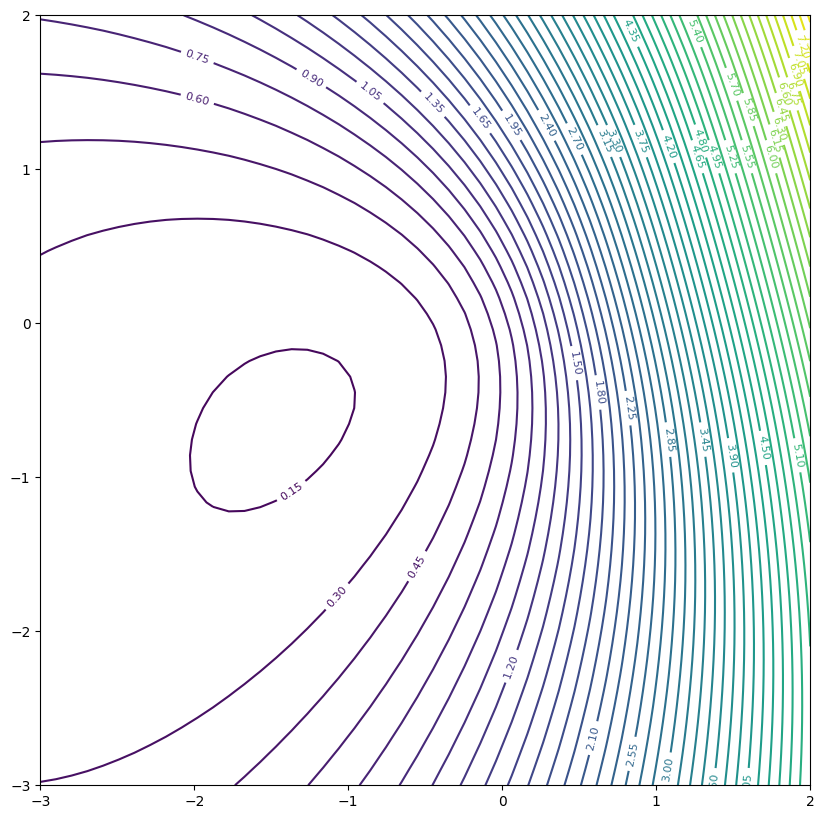

In [84]:
## Level circles of f
dom = ...
fig, ax = level_circle(f,dom)

In [85]:
def phi1_deriv(t):
    return ...
def phi2_deriv(t):
    return ...
    
# Note : il est possible de définir une version vectorisée du gradient (sans boucle for),
# que je n'ai pas implémenté ici. Le calcul en serait significativement accéléré.
def gradf(w):
    ...

In [86]:
# Check that your gradient implementation is correct
w = np.random.rand(2)
epsilon = 1e-8
print("This quantity must be of order 1e-8 : ", np.linalg.norm(gradf(w) - np.array([(f(w + epsilon*np.array([1,0])) - f(w))/(epsilon), (f(w + epsilon*np.array([0,1])) - f(w))/(epsilon)])))

This quantity must be of order 1e-8 :  1.4343463764364958e-07


## Exercice 2: 

Code the gradient_descent (with a fixed step, with Armijo and Armijo_Wolfe rules).
You can use your previous TP on gradient_descent (ENT305).

- Fixed Step: $x=x+\alpha d$ with $d=-\nabla f(x)$

- Armijo:

$\Phi(\alpha)=f(x+\alpha d)$


$\Phi'(\alpha)=(\nabla f(x+\alpha d),d)$


Rule: While $\Phi(f,x,\alpha,d)> \Phi(f,x,0,d)+c_1 \Phi'(gradf,x,0,d) \alpha$    
        $\alpha=\alpha \gamma$ (if $f$ does not sufficiently decrease $\gamma<1:$ We decrease $\alpha$)

- Wolfe:

Rule: 
    
    While Armijo ok, we increase $\alpha$:
        $\alpha=\eta \alpha$ (#where $\eta>1$)
    While Armijo or Wolfe condition not ok :
    If no Armijo:
        decrease $\alpha$ -> 
        max=$\alpha$
        $\alpha$=(max+min)/2
    else: 
        increase $alpha$ ->
        min=$\alpha$
        $\alpha$
        $\alpha$=(max+min)/2
            
      

In [87]:
# Gradient descent

def gradient_descent_fixedstep(gradf, x0, alpha, eps):
    # gradf: gradient function 
    # x0: starting point in R^2 
    # alpha: stepsize
    # eps: threshold
    
    x = x0
    x_list = [x0]
    ...
    return x_list 



def phik(f,xyk,alphak,dk):
    return f(xyk+alphak*dk)

def dphik(gradf,xyk,alphak,dk):
    grad_f=gradf(xyk+alphak*dk)
    return np.dot(grad_f,dk)

def armijo_rule(f,gradf,alpha,xy_old,d,c1,gamma): #d_x est la direction de descente d_x . grad_x <= 0
    # test f(x_new) \leq f(x_0) + c alpha dphi0
    iter=0   
    while ... and iter<500:     
        alpha*=gamma #gamma<1
        iter+=1
    return alpha  
    
def gradient_descent_armijostep(f,gradf, x0,alpha0, c1, gamma, eps):
    # gradf: gradient function 
    # x0: starting point in R^2 
    # alpha0: stepsize init
    # c1: constant in ]0,1[
    # gamma: update multiplicator for alpha in armijo
    # eps: threshold
    
    x = x0
    x_list = [x0]
    ...
    return x_list 

def wolfe_rule(f,gradf,alpha,xy_old,d,c1,c2,eta):
    #d_x est la direction de descente d_x . grad_x < 0
    # test f(x_new) \leq f(x_0) + c alpha dphi0

    test = 1
    d=-gradf(xy_old)
    iter = 0
    min_ = 0
    max_ = 1000
    #initialization if Armijo rule is satisfied increase alpha
    while ( phik(f,xy_old,alpha,d)<(phik(f,xy_old,0,d)+c1*dphik(gradf,xy_old,0,d)*alpha)) &(iter<=500): #armijo ok
        alpha=eta*alpha #where eta>1
        iter+=1
        
    iter = 0
    while (test!=0)&(iter<=500): 
        # if armijo rule + wolfe rule, break dphik(gradf,xnew,0,d) >= c2*np.dot(gradf(xy_old[0],xy_old[1]),d)
        if ((...) & (...)):
            test = 0
            
        elif ...: #no armijo
            max_ = alpha
            alpha = ...
            iter+=1
        else: # armijo ok, wolfe not ok
            minorant = alpha
            alpha = ...
            iter+=1
    return alpha

def gradient_descent_wolfstep(f,gradf, x0, alpha0,  c1,c2, eta, eps):
    # gradf: gradient function 
    # x0: starting point in R^2 
    # alpha0: stepsize init
    # c1: constant in ]0,1[
    # gamma: update multiplicator for alpha in armijo
    # eps: threshold
    
    x = x0
    x_list = [x0]
    ...
    return x_list 
    

#### Visualization

In [88]:
%%time

## FIXED STEP
#x0 = np.array([1.,1.])
#alpha = 1
#eps = 1e-5
#xlist_approx = gradient_descent_fixedstep(gradf, x0, alpha, eps)

## ARMIJO
#x0 = np.array([1,1])
#alpha = 2
#eps = 1e-5
#c1=.6
#gamma=0.5
#xlist_approx = gradient_descent_armijostep(f,gradf, x0, alpha,  c1, gamma, eps)

## WOLFE
#x0 = np.array([1,1])
#alpha=2
#c1=.4
#c2=.8
#eta=2.
#xlist_approx = gradient_descent_wolfstep(f,gradf, x0, alpha,  c1,c2, eta, eps)

## Visualize the number of iterations 
len(xlist_approx)

CPU times: user 190 ms, sys: 41.4 ms, total: 231 ms
Wall time: 193 ms


15

[1. 1.]


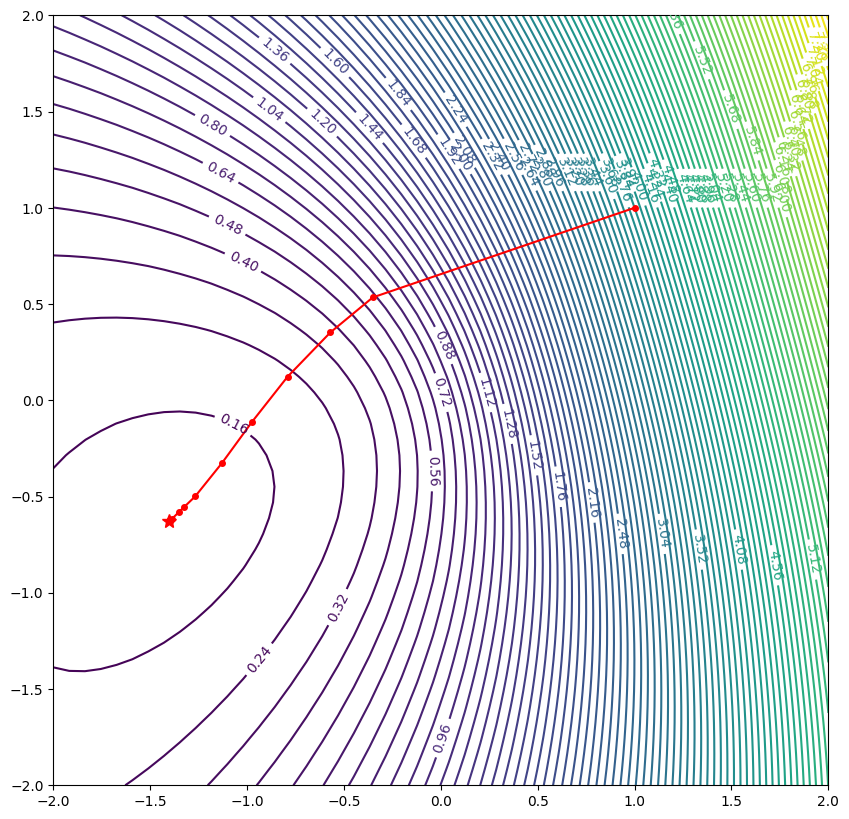

In [89]:
m = 1
dom = ...
plot_descent(f, dom, m, xlist_approx, xlist_approx[-1])

### separation line

In [90]:
## Function used to separate the data
def opt_f(xstar,z):
    return ...
    

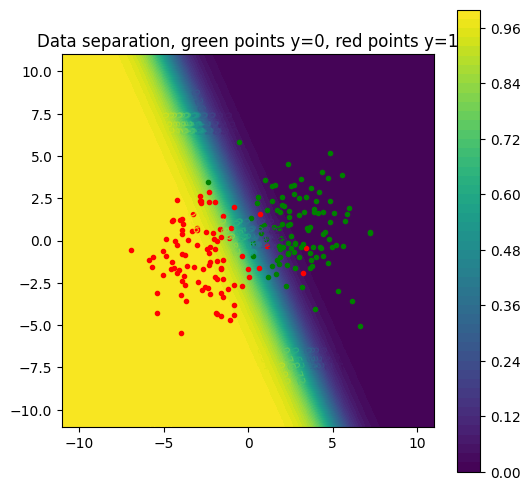

In [91]:
## Affiche la séparation des données à partir de l'optimum xstar_approx choisi
dom_points = [-11, 11, -11, 11]
grid_size = 50
x, y = np.linspace(dom_points[0], dom_points[1], grid_size), np.linspace(dom_points[2], dom_points[3], grid_size)
X, Y = np.meshgrid(x, y)
Z = np.zeros((grid_size, grid_size))
for i in range(grid_size):
    for j in range(grid_size):
        Z[i, j] = opt_f(xlist_approx[-1],[X[i, j], Y[i, j]])  #between 0 and 1
# Graphique des lignes de niveaux
fig, ax = plt.subplots(figsize = (6, 6))
CS = ax.contourf(X, Y, Z, 50, cmap = "viridis")
cbar = plt.colorbar(CS) 

for i in range(n):
    if yi_list[i] == 1:
        plt.plot(xi_list[i, 0], xi_list[i, 1], linestyle = "none", marker = '.', color = "red")
    else:
        plt.plot(xi_list[i, 0], xi_list[i, 1], linestyle = "none", marker = '.', color = "green")
ax.clabel(CS, fontsize = 8)
ax.set_title(r"Data separation, green points y=0, red points y=1")
ax.set_aspect("equal", adjustable = "box") # pour que les axes aient la même échelle

## Exercice 3

Code the Newton algorithm. You first need to compute the hessian matrix.

Indication: You can write the hessian of the two previous functions $\texttt{phi1}$ and $\texttt{phi2}$ that will represents $- log (\sigma(z))$ and $-log(1-\sigma(z))$ resp.

In [92]:
##Compute hessian 

def phi1_deriv2(t):
    return ...
def phi2_deriv2(t):
    return ...

# Pour Newton, calcul de la hessienne  
def hessf(w):
    dim = w.size
    u = np.zeros([dim,dim])
    for i in range(n):
        xi = ...
        yi = ...
        gamma = ... #w@x
        z = ... #yi*phi1''(gamma) + (1-yi) phi2''(gamma)
        Mi = np.dot(xi[:,None], np.transpose(xi[:,None])) #x^2
        u = u + z*Mi 
    return (1/n)*u +lda*np.eye(dim)

# Check that your gradient implementation is correct
w = np.random.rand(2)
epsilon = 1e-8
print("This quantity must be of order 1e-8 : ", np.linalg.norm(hessf(w) - np.array([(gradf(w + epsilon*np.array([1,0])) - gradf(w))/(epsilon), (gradf(w + epsilon*np.array([0,1])) - gradf(w))/(epsilon)])))

This quantity must be of order 1e-8 :  1.3150927678197707e-07


In [93]:
#  Newton algorithm
def Newton(f,gradf, hessf,x0,alpha, eps):
    x = x0
    x_list = [x0]
    
    ...
    return x_list

In [122]:
#  Newton algorithm
def Newton_armijo(f,gradf, hessf,x0,alpha0, c1, gamma, eps) :
    x = x0
    x_list = [x0]
    ...

    return x_list

#  Newton algorithm
def Newton_wolfe(f,gradf, hessf,x0,alpha0, c1,c2, eta, eps) :
    x = x0
    x_list = [x0]
    ...
    return x_list


#### Visualization

In [131]:
%%time

lda = 5e-2#.01
x0 = np.array([0.,0.])

alpha = 1
eps = 1e-5
#xlist_approx = Newton(f,gradf, hessf,x0,alpha, eps)
#xlist_approx = gradient_descent_fixedstep(gradf,x0,alpha, eps)

#alpha = 2
c1=.4
gamma=0.5


c1=1e-2
c2=.8
eta=1.
alpha = 2
#xlist_approx = gradient_descent_wolfstep(f,gradf, x0, alpha,  c1,c2, eta, eps)#
#xlist_approx = Newton_wolfe(f,gradf, hessf,x0,alpha,c1,c2,eta, eps)
xlist_approx =Newton_armijo(f,gradf, hessf,x0,alpha, c1, gamma, eps)

len(xlist_approx)


CPU times: user 39.9 ms, sys: 9.75 ms, total: 49.7 ms
Wall time: 41 ms


6

[0. 0.]


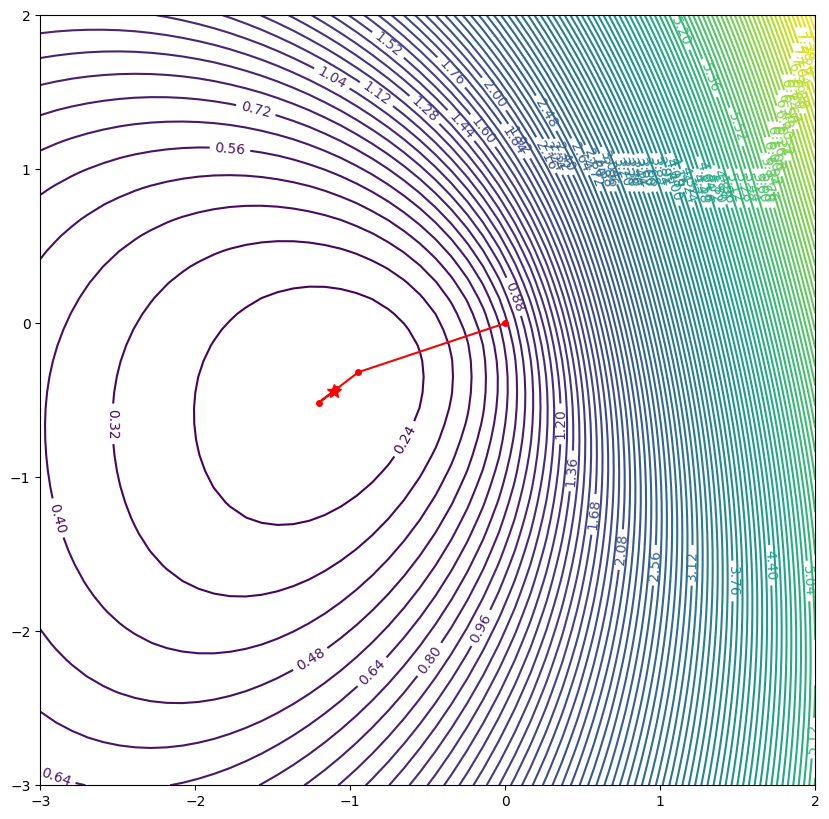

In [132]:
m = 1
dom = [-3,2, -3, 2]
print(xlist_approx[0])
plot_descent(f, dom, m, xlist_approx, xlist_approx[-1])

## Exercice 4: Stochastic version

Write $f$ as the function
$f(w)  =  \frac{1}{n} \sum_{i=1}^n  f_i(w).$

For $f = \tfrac{1}{n} \sum_{i=1}^n f_i : \mathbb{R}^n \to  \mathbb{R}$, parameters $x_0  \in \mathbb{R}^n$, $\alpha_0>0$, $0< \kappa \leq 1$.

$\alpha_k = \frac{\alpha_0}{(k+1)^\kappa}$,   $d_k = -\nabla f_{i_k}(x_k)$ where $i_k$ are uniformly taken on $\{0, \ldots, n-1\}$.


In [168]:
# Pour le gradient stochastique, calcul des gradients des f_i
def gradf_partiel(w,i):
    dim = w.size
    xi = ...
    yi = ...
    gamma = ...
    z = ...
    u = ...
    return u 
    
# Algorithme de descente de gradient stochastique
def stochastic_gradient(gradf_partiel, x0, alpha0, kappa, K):
    x = x0
    k = 0
    x_list = [x0]
    while k<K: 
        i = ... #be
        d = ...
        x = ...
        x_list.append(x)
        k = k+1
    return x_list

In [174]:
x0=np.array([-1,-1])
alpha0 = 1.
kappa = 1.
K = 100
xlist_approx =stochastic_gradient(gradf_partiel, x0, alpha0, kappa, K)
len(xlist_approx)

101

[-1 -1]


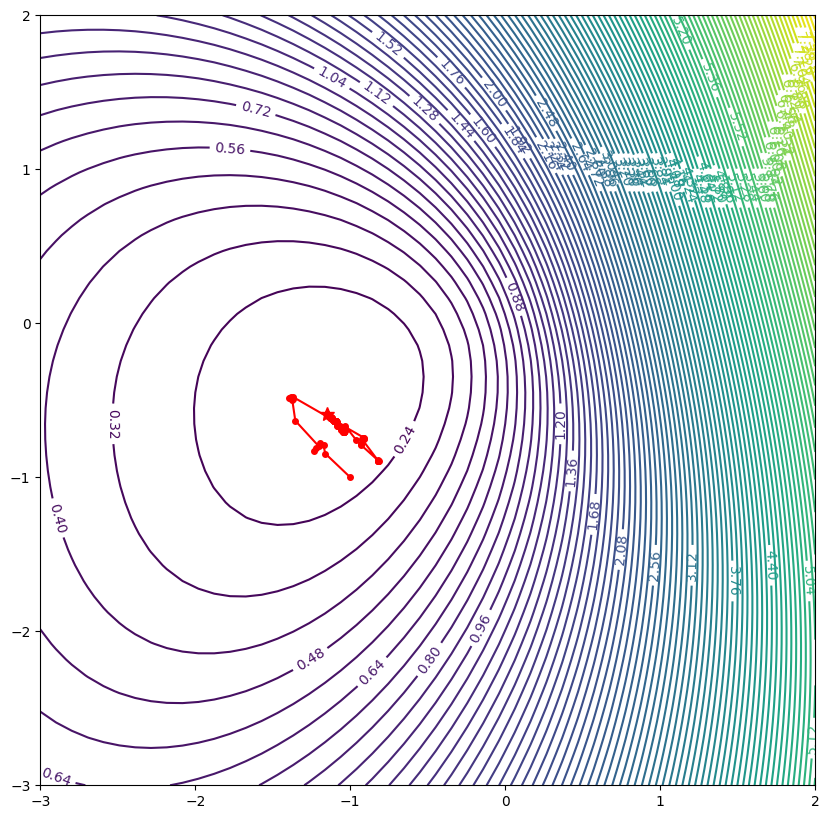

In [175]:
m = 1
dom = [-3,2, -3, 2]
print(xlist_approx[0])
plot_descent(f, dom, m, xlist_approx, xlist_approx[-1])